<a href="https://colab.research.google.com/github/babuyashwanth/CNN-models/blob/main/Number_Classification_using_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

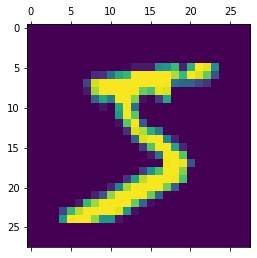

In [5]:
plt.matshow(X_train[0])

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train_flatttened = X_train.reshape(len(X_train),28*28)
X_test_flatttened = X_test.reshape(len(X_test),28*28)

In [10]:
X_test_flatttened.shape

(10000, 784)

In [11]:
X_train_flatttened.shape

(60000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(28,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flatttened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4824 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3043 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2835 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2669 - accuracy: 0.9253


In [15]:
model.evaluate(X_test_flatttened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2674 - accuracy: 0.9255


[0.26738470792770386, 0.9254999756813049]

In [16]:
y_predicted = model.predict(X_test_flatttened)

In [18]:
y_predicted[1]

array([7.7490240e-01, 4.5115143e-02, 9.9983001e-01, 6.8222219e-01,
       3.0650356e-09, 9.6119249e-01, 9.6603918e-01, 3.3897564e-12,
       3.2756796e-01, 7.8160420e-09, 1.1101809e-07, 2.0283936e-07,
       1.3305564e-07, 1.4612982e-07, 1.4281717e-07, 1.7857204e-07,
       1.0789466e-07, 3.7450906e-08, 1.0764758e-07, 2.7311165e-07,
       7.6876077e-08, 2.7782050e-07, 3.7607453e-08, 1.4730529e-07,
       8.3488153e-08, 4.0913920e-07, 1.3290371e-07, 1.6644887e-07],
      dtype=float32)

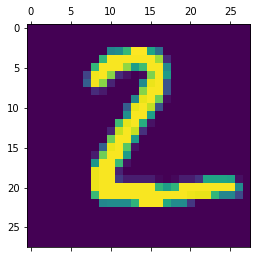

In [22]:
plt.matshow(X_test[1])

In [24]:
np.argmax(y_predicted[1])

2

In [29]:
y_predicted_labels=[np.argmax (i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [30]:
from sklearn.metrics  import confusion_matrix
cm = confusion_matrix(y_test,y_predicted_labels)

In [31]:
cm

array([[ 963,    0,    1,    2,    0,    4,    7,    2,    1,    0],
       [   0, 1120,    2,    2,    0,    1,    4,    2,    4,    0],
       [   8,   11,  920,   14,    8,    5,   13,   10,   37,    6],
       [   4,    0,   21,  910,    0,   33,    2,    9,   20,   11],
       [   1,    1,    3,    0,  902,    0,   13,    3,    9,   50],
       [  11,    3,    2,   18,    9,  791,   17,    5,   28,    8],
       [  11,    3,    4,    1,    7,    9,  921,    1,    1,    0],
       [   1,    7,   22,    8,    9,    1,    0,  936,    1,   43],
       [   9,   15,    6,   18,    9,   31,   10,   10,  856,   10],
       [  10,    7,    2,    8,   21,    6,    0,   14,    5,  936]])

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print(accuracy_score(y_test,y_predicted_labels))

0.9255


In [34]:
##increasing the number of hidden layers. 

In [36]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(15,activation='sigmoid')
])

model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flatttened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4202 - accuracy: 0.8932
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2040 - accuracy: 0.9420
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1528 - accuracy: 0.9562
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1205 - accuracy: 0.9664
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0985 - accuracy: 0.9720
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0833 - accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0701 - accuracy: 0.9797
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0605 - accuracy: 0.9834
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0518 - accuracy: 0.9859
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.044

In [37]:
model.evaluate(X_test_flatttened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9762


[0.07972586899995804, 0.9761999845504761]

In [38]:
y_predicted=model.predict(X_test_flatttened)

In [39]:
y_predicted

array([[9.2108548e-03, 1.3241798e-02, 3.7708619e-01, ..., 7.9840379e-07,
        2.0361510e-06, 1.2142388e-06],
       [5.3029895e-02, 9.0914547e-01, 9.9952948e-01, ..., 4.0677799e-07,
        1.7653460e-06, 1.0059321e-06],
       [2.9041632e-05, 9.9795103e-01, 1.5283021e-01, ..., 4.7874158e-07,
        1.5209371e-06, 9.6257679e-07],
       ...,
       [3.1020503e-05, 1.7824769e-04, 5.7518482e-04, ..., 4.1690765e-07,
        5.0358062e-07, 1.5049819e-06],
       [2.6259124e-03, 8.4796250e-03, 1.1267313e-04, ..., 2.6763743e-07,
        5.9490304e-07, 1.9869456e-06],
       [2.9118961e-01, 1.2184083e-03, 7.0431519e-01, ..., 1.0868807e-06,
        2.1863386e-06, 1.9490221e-06]], dtype=float32)

In [42]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [45]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [46]:
print(accuracy_score(y_test,y_predicted_labels))

0.9762


Text(69.0, 0.5, 'Truth')

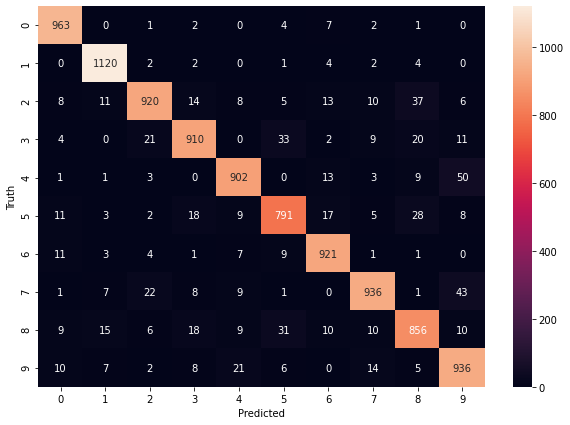

In [47]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')